## CISC 614 - Assignment 6
#### Model to predict height from pressure
#### Roman Moser 187700
Data source: http://borealscicomp.com/Academic/HU/CISC614-LF19/Assignment06/fairbanks_sounding.dat

#### ABSTRACT / INTRODUCTION
In this assignment we try to find a model that best estimates the height in the atmosphere (dependent variable) from the pressure (independent variable). We experiment with an exponential and a power model, whereas we first transform the axis to obtain a linear relationship and then calculate the linear regression coefficients to obtain the final model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def linear_reg_estimate_coef(x, y): 
    """
    function to estimate coefficients of Linear regression
    as implemented by: 
    https://www.geeksforgeeks.org/linear-regression-python-implementation/
    """
    n = np.size(x)
    m_x, m_y = np.mean(x), np.mean(y) 
    SS_xy = np.sum(y * x) - n * m_y * m_x 
    SS_xx = np.sum(x * x) - n * m_x * m_x 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1 * m_x   
    return b_0, b_1

In [3]:
# load and transform data
file = open('fairbanks_sounding.txt', 'r').read()
file = file.split('\n')
header = re.sub('  +', ',', file[0]).split(',')
data = file[1:-1]
for i, line in enumerate(data):
    data[i] = re.sub(' *', '', re.sub('   +', ',', line))
    data[i] = data[i].split(',')
df = pd.DataFrame(data, columns=header).apply(pd.to_numeric)

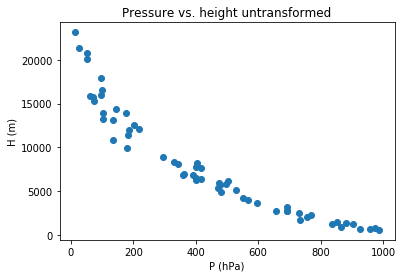

In [4]:
# plot data
plt.scatter(df['P (hPa)'], df['H (m)'])
plt.xlabel('P (hPa)')
plt.ylabel('H (m)')
plt.title('Pressure vs. height untransformed')
plt.show()

The plot above shows the measured data points and plots pressure (P (hPa)) vs. height (H (m)). We can see that the air pressure decreases with the height and that the relationship between the two variables is nonlinear.

### Exponential model: h = a * exp(b * P)

Below we fit an exponential model to predict the height from the pressure. We first estimate the coefficients, then transform the pressure with the exponential function until we graphically obtain a linear relationship between P_exponential and H. We then calculate the linear regression coefficients and estimate H ("H_est_exp") from P.

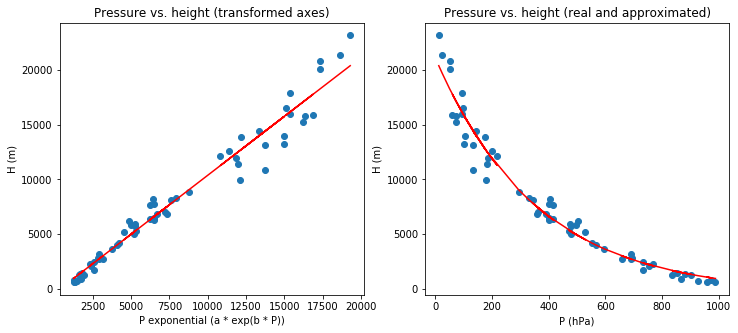

In [5]:
# estimate coefficients
a_est = 20000
b_est = -0.0028
df['P exponential'] = df['P (hPa)'].apply(lambda x: a_est * np.exp(b_est * x))

# linear regression:
alpha, beta = linear_reg_estimate_coef(df['P exponential'], df['H (m)'])
df['H_est_exp'] = df['P exponential'].apply(lambda x: alpha + beta * x)

# plot exponential model (transform axis)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['P exponential'], df['H (m)'])
plt.plot(df['P exponential'], df['H_est_exp'], color='red')
plt.xlabel('P exponential (a * exp(b * P))')
plt.ylabel('H (m)')
plt.title('Pressure vs. height (transformed axes)')

# plot regular model:
plt.subplot(1, 2, 2)
plt.scatter(df['P (hPa)'], df['H (m)'])
plt.plot(df['P (hPa)'], df['H_est_exp'], color='red')
plt.xlabel('P (hPa)')
plt.ylabel('H (m)')
plt.title('Pressure vs. height (real and approximated)')
plt.show()

Above are the plots of the pressure vs height with a transformed P axis and the estimated heights based on the linear regression applied to the exponential model. We see that the estimates for data points with low pressure and high altitude seem to be quite inaccurate.

To quantify the model result we calculate the bounds for the Chebyshev criteria (cmax) below:

In [6]:
# Compute the bounds of the Chebyshev criteria, cmax
df['d'] = (df['H (m)'] - df['H_est_exp']).abs()
D = np.round(np.sqrt(df['d'].apply(lambda x: x**2).sum() / df.shape[0]), 3)
d_max = np.round(df['d'].max(), 3)
print('Bounds for Chebyshev criteria cmax with exponential model: D = {}, d_max = {}'.format(D, d_max))

Bounds for Chebyshev criteria cmax with exponential model: D = 1155.045, d_max = 3555.95


### Power model h = a * P^b

Next, we repeat the procedure with the power model to check if we are able to obtain a more accurate estimate of the height.

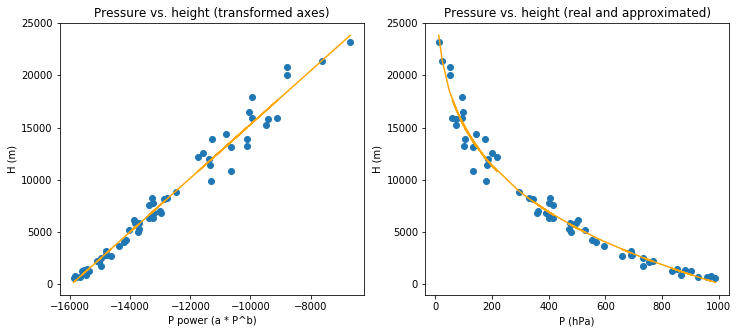

In [7]:
# estimate coefficients
a_est = -4000
b_est = 0.2
df['P power'] = df['P (hPa)'].apply(lambda x: a_est * x**b_est)

# linear regression:
alpha, beta = linear_reg_estimate_coef(df['P power'], df['H (m)'])
df['H_est_power'] = df['P power'].apply(lambda x: alpha + beta * x)

# plot power model (transform axis)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['P power'], df['H (m)'])
plt.plot(df['P power'], df['H_est_power'], color='orange')
plt.xlabel('P power (a * P^b)')
plt.ylabel('H (m)')
plt.title('Pressure vs. height (transformed axes)')

# plot regular model:
plt.subplot(1, 2, 2)
plt.scatter(df['P (hPa)'], df['H (m)'])
plt.plot(df['P (hPa)'], df['H_est_power'], color='orange')
plt.xlabel('P (hPa)')
plt.ylabel('H (m)')
plt.title('Pressure vs. height (real and approximated)')
plt.show()

In [8]:
# Compute the bounds of the Chebyshev criteria, cmax
df['d_power'] = (df['H (m)'] - df['H_est_power']).abs()
D = np.round(np.sqrt(df['d_power'].apply(lambda x: x**2).sum() / df.shape[0]), 3)
d_max = np.round(df['d_power'].max(), 3)
print('Bounds for Chebyshev criteria cmax with exponential model: D = {}, d_max = {}'.format(D, d_max))

Bounds for Chebyshev criteria cmax with exponential model: D = 979.757, d_max = 2769.895


The bounds of the Chebyshev criteria show that our estimates with the power model are significantly lower than those of the exponential model. This shows that the power model delivers more accurate results.

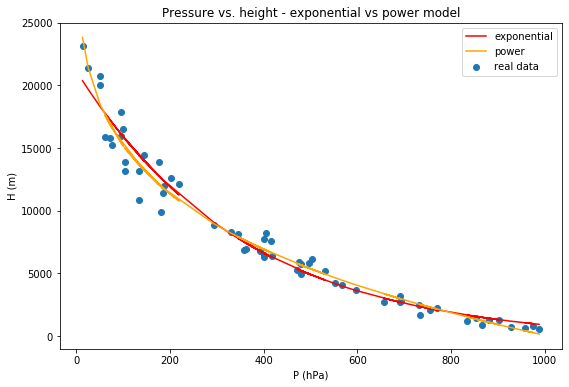

In [9]:
# Compare exponential and power model:
plt.figure(figsize=(9, 6))
plt.scatter(df['P (hPa)'], df['H (m)'])
plt.plot(df['P (hPa)'], df['H_est_exp'], color='red')
plt.plot(df['P (hPa)'], df['H_est_power'], color='orange')
plt.legend(['exponential', 'power', 'real data'])
plt.xlabel('P (hPa)')
plt.ylabel('H (m)')
plt.title('Pressure vs. height - exponential vs power model')
plt.show()

#### CONCLUSION

The comparison above visualizes how the power model (orange line) approximates the height much more accurate than the exponential model (red line). Especially for low pressures (high altitude) the power model delivers accurate results.

The difference in the shape of the power function vs. the exponential function is that the power function increases faster in the beginning compared to the exponential function which increases slower at first (and faster later on). Since we have a negative correlation between pressure and height the coefficients in the exponents of both functions must be negative. In that case we have the inverse of the positive exponents where the power function approaches infinity faster (for x->0) than the exponential function. The relationship of pressure vs height resembles more the power function. 